<a href="https://colab.research.google.com/github/antfolk/BMEN35_2023/blob/main/Session2/BMEN35_Ex5_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree
In this notebook we will be using decision trees. And we will use the example from the book (Example 2.6).

Lets first import the libraries and generate the data.

In [1]:
import numpy as np # Them good ol' libraries we always use
import matplotlib.pyplot as plt

X = np.array([[9,2],[1,4],[4,6],[4,1],[1,2],[1,8],[6,4],[7,9],[9,8],[9,6]]) # x1,x2 pair for the data
y = np.array([0,0,0,0,0,1,1,1,1,1]) # the two different classes of the data (red and blue)


Before you start anything in machine learning always check your data!!!!!!

So we will start be making a simple scatter plot of our data.

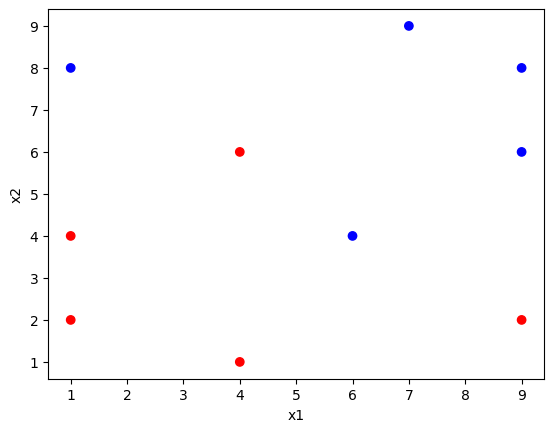

In [2]:
colormap = np.array(['r', 'b'])
plt.scatter(X[:,0],X[:,1],c=colormap[y])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

The above plot is the same one as for the example in the book (Example 2.6).

Let begin constructing the algorithm...

We will start with putting the X and y in the same matrix

In [3]:
data = np.column_stack((X,y))

In the book they do some "preprocessing" so they wont need to go through all possible splits. Let us do the same.

In [4]:
x1_unq = np.unique(data[:,0]) # We find unique (and sorted) values of the data in column 0 that is "feature" x1.
split_x1 = (x1_unq[1:]+x1_unq[:-1]) / 2 # From the unique values find where splits for x0 should be using special syntax....
x2_unq = np.unique(data[:,1]) # We do the same for column 1 / feature "x2"
split_x2 = (x2_unq[1:]+x2_unq[:-1]) / 2 #From the unique values find where splits for x0 should be using special syntax....

Next thing to do is to decide on a splitting criterion. The book used entropy so lets do the same. We do a quick googling of entropy and find that the good people who have written the SciPy library has implemented this function. So lets use that. We start by importing entropy from scipy. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html


In [5]:
from scipy.stats import entropy


Now for one "iteration" of the algorithm.

In [6]:
Qtot = np.zeros([len(split_x1)+len(split_x2),3]) # First we "allocate" some space
k = 0
for i in split_x1:
    tmp = data[np.where(data[:,0] < i),2]
    blues = np.sum(tmp==0)
    reds = np.sum(tmp==1)
    n1 = blues + reds
    pi_1_blue = blues/n1
    pi_1_red = reds /n1
    Q_1 = entropy([pi_1_blue, pi_1_red])
    tmp = data[np.where(data[:,0] >= i),2]
    blues = np.sum(tmp==0)
    reds = np.sum(tmp==1)
    n2 = blues + reds
    pi_2_blue = blues/n2
    pi_2_red = reds /n2
    Q_2 = entropy([pi_2_blue, pi_2_red])
    Qtot[k,0] = 0 # x1 feature column
    Qtot[k,1] = i # where da split
    Qtot[k,2] = n1*Q_1+n2*Q_2
    k +=1

# Find split in x2 (second feature)
x2_unq = np.unique(data[:,1])
# From the unique values find where splits should be using special syntax....
split_x2 = (x2_unq[1:]+x2_unq[:-1]) / 2
for i in split_x2:
    tmp = data[np.where(data[:,1] < i),2]
    blues = np.sum(tmp==0)
    reds = np.sum(tmp==1)
    n1 = blues + reds
    pi_1_blue = blues/n1
    pi_1_red = reds /n1
    Q_1 = entropy([pi_1_blue, pi_1_red])
    tmp = data[np.where(data[:,1] >= i),2]
    blues = np.sum(tmp==0)
    reds = np.sum(tmp==1)
    n2 = blues + reds
    pi_2_blue = blues/n2
    pi_2_red = reds /n2
    Q_2 = entropy([pi_2_blue, pi_2_red])
    Qtot[k,0] = 1 # x1 feature column
    Qtot[k,1] = i # where da split
    Qtot[k,2] = n1*Q_1+n2*Q_2
    k +=1

# Now we have all the Entropy measures for all the ways to do the first split and we find the lowest value at
first_split = np.argmin(Qtot[:,2])
print("We split based on the feature in column {:f} when less than {:f} with entropy {:f}".format(Qtot[first_split,0],Qtot[first_split,1],Qtot[first_split,2]))

We split based on the feature in column 1.000000 when less than 3.000000 with entropy 4.187887


We will plot the data again with the split

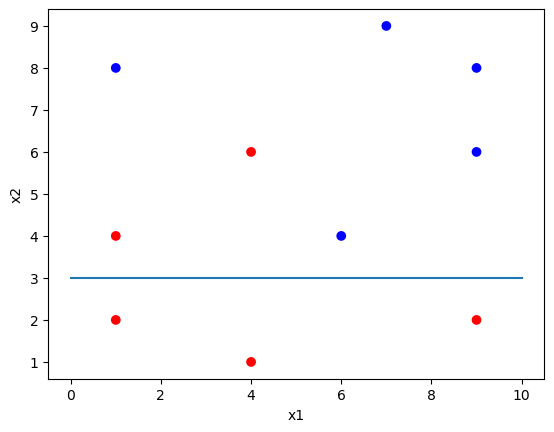

In [7]:
colormap = np.array(['r', 'b'])
plt.scatter(X[:,0],X[:,1],c=colormap[y])
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot([0,10],[Qtot[first_split,1],Qtot[first_split,1]])
plt.show()

We have our first split and then we continue

In [8]:
# We make a copy of the dataset that is left to split
data = data[np.where(data[:,int(Qtot[first_split,0])] > Qtot[first_split,1])]
# And then we start over...
x1_unq = np.unique(data[:,0])
# From the unique values find where splits should be using special syntax....
split_x1 = (x1_unq[1:]+x1_unq[:-1]) / 2
# Find split in x2 (second feature)
x2_unq = np.unique(data[:,1])
# From the unique values find where splits should be using special syntax....
split_x2 = (x2_unq[1:]+x2_unq[:-1]) / 2
Qtot = np.zeros([len(split_x1)+len(split_x2),3])
k = 0
for i in split_x1:
    #print(i)
    #tmp = np.where(data[:,0] < i)
    #unique, counts = np.unique(data[np.where(data[:,0] < i),2],return_counts=True)
    tmp = data[np.where(data[:,0] < i),2]
    blues = np.sum(tmp==0)
    reds = np.sum(tmp==1)
    n1 = blues + reds
    pi_1_blue = blues/n1
    pi_1_red = reds /n1
    Q_1 = entropy([pi_1_blue, pi_1_red])
    #unique, counts = np.unique(data[np.where(data[:,0] >= i),2],return_counts=True)
    tmp = data[np.where(data[:,0] >= i),2]
    blues = np.sum(tmp==0)
    reds = np.sum(tmp==1)
    n2 = blues + reds
    pi_2_blue = blues/n2
    pi_2_red = reds /n2
    Q_2 = entropy([pi_2_blue, pi_2_red])
    Qtot[k,0] = 0 # x1 feature column
    Qtot[k,1] = i # where da split
    Qtot[k,2] = n1*Q_1+n2*Q_2
    k +=1

# Find split in x2 (second feature)
x2_unq = np.unique(data[:,1])
# From the unique values find where splits should be using special syntax....
split_x2 = (x2_unq[1:]+x2_unq[:-1]) / 2
for i in split_x2:
    #print(i)
    #tmp = np.where(data[:,0] < i)
   # unique, counts = np.unique(data[np.where(data[:,1] < i),2],return_counts=True)
    tmp = data[np.where(data[:,1] < i),2]
    blues = np.sum(tmp==0)
    reds = np.sum(tmp==1)
    n1 = blues + reds
    pi_1_blue = blues/n1
    pi_1_red = reds /n1
    Q_1 = entropy([pi_1_blue, pi_1_red])
  #  unique, counts = np.unique(data[np.where(data[:,1] >= i),2],return_counts=True)
    tmp = data[np.where(data[:,1] >= i),2]
    blues = np.sum(tmp==0)
    reds = np.sum(tmp==1)
    n2 = blues + reds
    pi_2_blue = blues/n2
    pi_2_red = reds /n2
    Q_2 = entropy([pi_2_blue, pi_2_red])
    Qtot[k,0] = 1 # x1 feature column
    Qtot[k,1] = i # where da split
    Qtot[k,2] = n1*Q_1+n2*Q_2
    k +=1

# Now we all the Entropy measures for all the ways to do the first split we find the lowest value at
second_split = np.argmin(Qtot[:,2])
print("We split based on the feature in column {:f} when less than {:f} with entropy {:f}".format(Qtot[second_split,0],Qtot[second_split,1],Qtot[second_split,2]))


We split based on the feature in column 0.000000 when less than 5.000000 with entropy 1.909543


We found our second split so lets plot it.

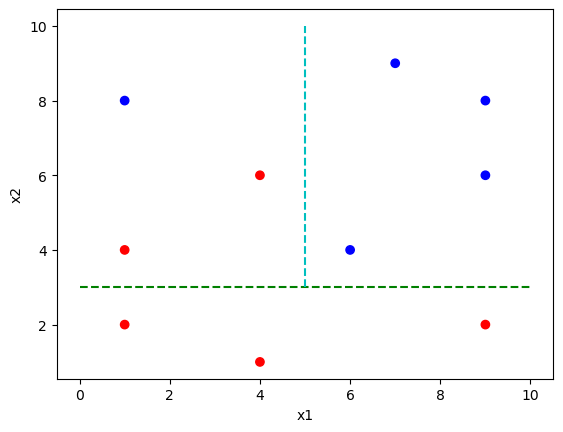

In [9]:
colormap = np.array(['r', 'b'])
plt.scatter(X[:,0],X[:,1],c=colormap[y])
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot([0,10],[3,3],'g--') # We remembered that the previous split was at y = 3
plt.plot([Qtot[second_split,1],Qtot[second_split,1]],[3,10],'c--')
plt.show()

As you might have realised, a lot of this code is repetition so a lot of the code can be reused using functions and recursion.

## The end